## **QUESTION 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # importing packages

def noisysine(k_in, x_in, amp_in):

    """
    Generate a noisy sine wave.

    INPUT:
    k_in: Wavenumber of the sine wave.
    x_in : x values defining range.
    amp_in: amplitude of the noise.

    OUTPUT:
    noisy wave array: Noisy sine wave.
    """

    clean_wave = np.sin(k_in * x_in)   # makes a clean sine wave

    noise = np.random.normal(0, amp_in, len(x_in))  #random noise generation

    noisy_wave = clean_wave + noise #summing up clean wave and noise gives noisy wave

    return noisy_wave

# defining paramteres according to the question

x = np.linspace(0, 10*np.pi, 300)
# range with 300 steps and goes from 0 - 10pi
k1 = 1.925  #first sine wave
k2 = 2.075  #second sine wave
amp = 0.2  # amplitude for both waves

# generating 2 waves given
noisy_wave1 = noisysine(k1, x, amp)
noisy_wave2 = noisysine(k2, x, amp)


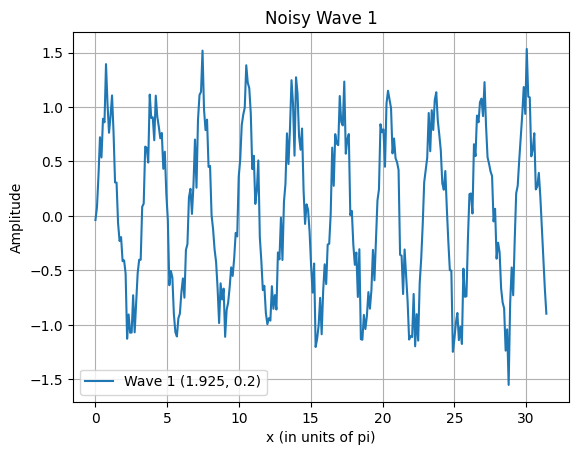

In [ ]:
#plotting wave 1 ----> k = 1.925

plt.plot(x, noisy_wave1, label=f'Wave 1 ({k1}, {amp})')
plt.xlabel('x (in units of pi)')
plt.ylabel('Amplitude')
plt.title('Noisy Wave 1')
plt.legend()
plt.grid(True)
plt.show()

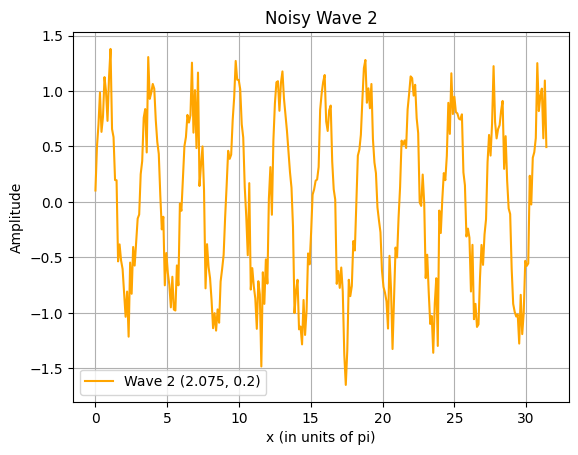

In [ ]:
#plotting wave 2 -----> k = 2.075

plt.plot(x, noisy_wave2, label=f'Wave 2 ({k2}, {amp})',color ='orange')

plt.xlabel('x (in units of pi)')
plt.ylabel('Amplitude')
plt.title('Noisy Wave 2')
plt.legend()
plt.grid(True)
plt.show()

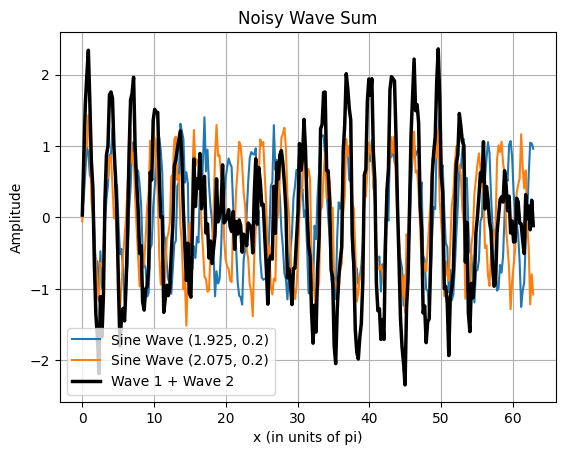

In [ ]:
plt.plot(x, noisy_wave1, label=f'Sine Wave ({k1}, {amp})')
plt.plot(x, noisy_wave2, label=f'Sine Wave ({k2}, {amp})')
plt.plot(x, noisy_wave1 + noisy_wave2,
         label='Wave 1 + Wave 2',linewidth = 2.5, color ='black')
 #linewidth is from GPT used for explicit summed graph
plt.xlabel('x (in units of pi)')
plt.ylabel('Amplitude')
plt.title('Noisy Wave Sum')
plt.legend()
plt.grid(True)
plt.show()


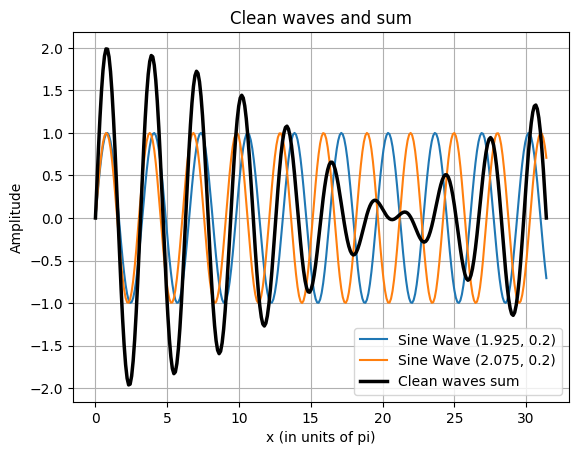

In [ ]:
"""CHECKING WITH NO NOISE PATTERN"""
x = np.linspace(0, 10*np.pi, 300)
clean_wave1 = np.sin(k1*x)
clean_wave2 = np.sin(k2*x)

plt.plot(x, clean_wave1, label=f'Sine Wave ({k1}, {amp})')
plt.plot(x, clean_wave2, label=f'Sine Wave ({k2}, {amp})')
plt.plot(x, clean_wave1 + clean_wave2,
         label='Clean waves sum',linewidth = 2.5, color ='black')
#linewidth is from GPT used for explicit summed graph
plt.xlabel('x (in units of pi)')
plt.ylabel('Amplitude')
plt.title('Clean waves and sum')
plt.legend()
plt.grid(True)
plt.show()


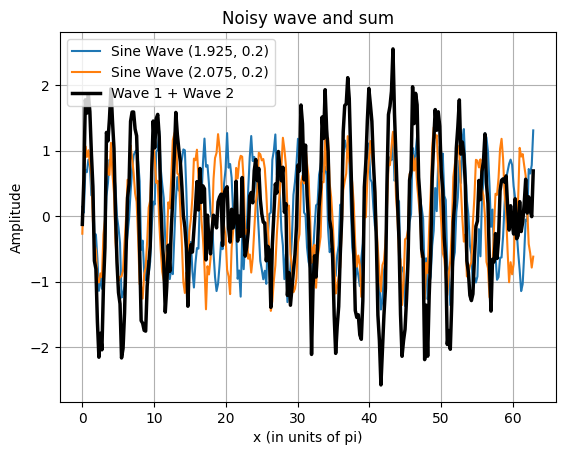

In [ ]:
"""TEST FOR BEAT PATTERN USING LARGER RANGE OF X 0 - 20pi; for my own sanity"""

x = np.linspace(0, 20*np.pi, 300)  # range with 300 steps and goes from 0 - 20pi
k1 = 1.925  #first sine wave
k2 = 2.075  #second sine wave
amp = 0.2  # amplitude for both waves


noisy_wave1 = noisysine(k1, x, amp)
noisy_wave2 = noisysine(k2, x, amp) # noisy wave generation


plt.plot(x, noisy_wave1, label=f'Sine Wave ({k1}, {amp})')
plt.plot(x, noisy_wave2, label=f'Sine Wave ({k2}, {amp})')
plt.plot(x, noisy_wave1 + noisy_wave2,
         label='Wave 1 + Wave 2',linewidth = 2.5, color ='black')
#linewidth is from GPT used for explicit summed graph
plt.xlabel('x (in units of pi)')
plt.ylabel('Amplitude')
plt.title('Noisy wave and sum')
plt.legend()
plt.grid(True)
plt.show()


## **QUESTION 2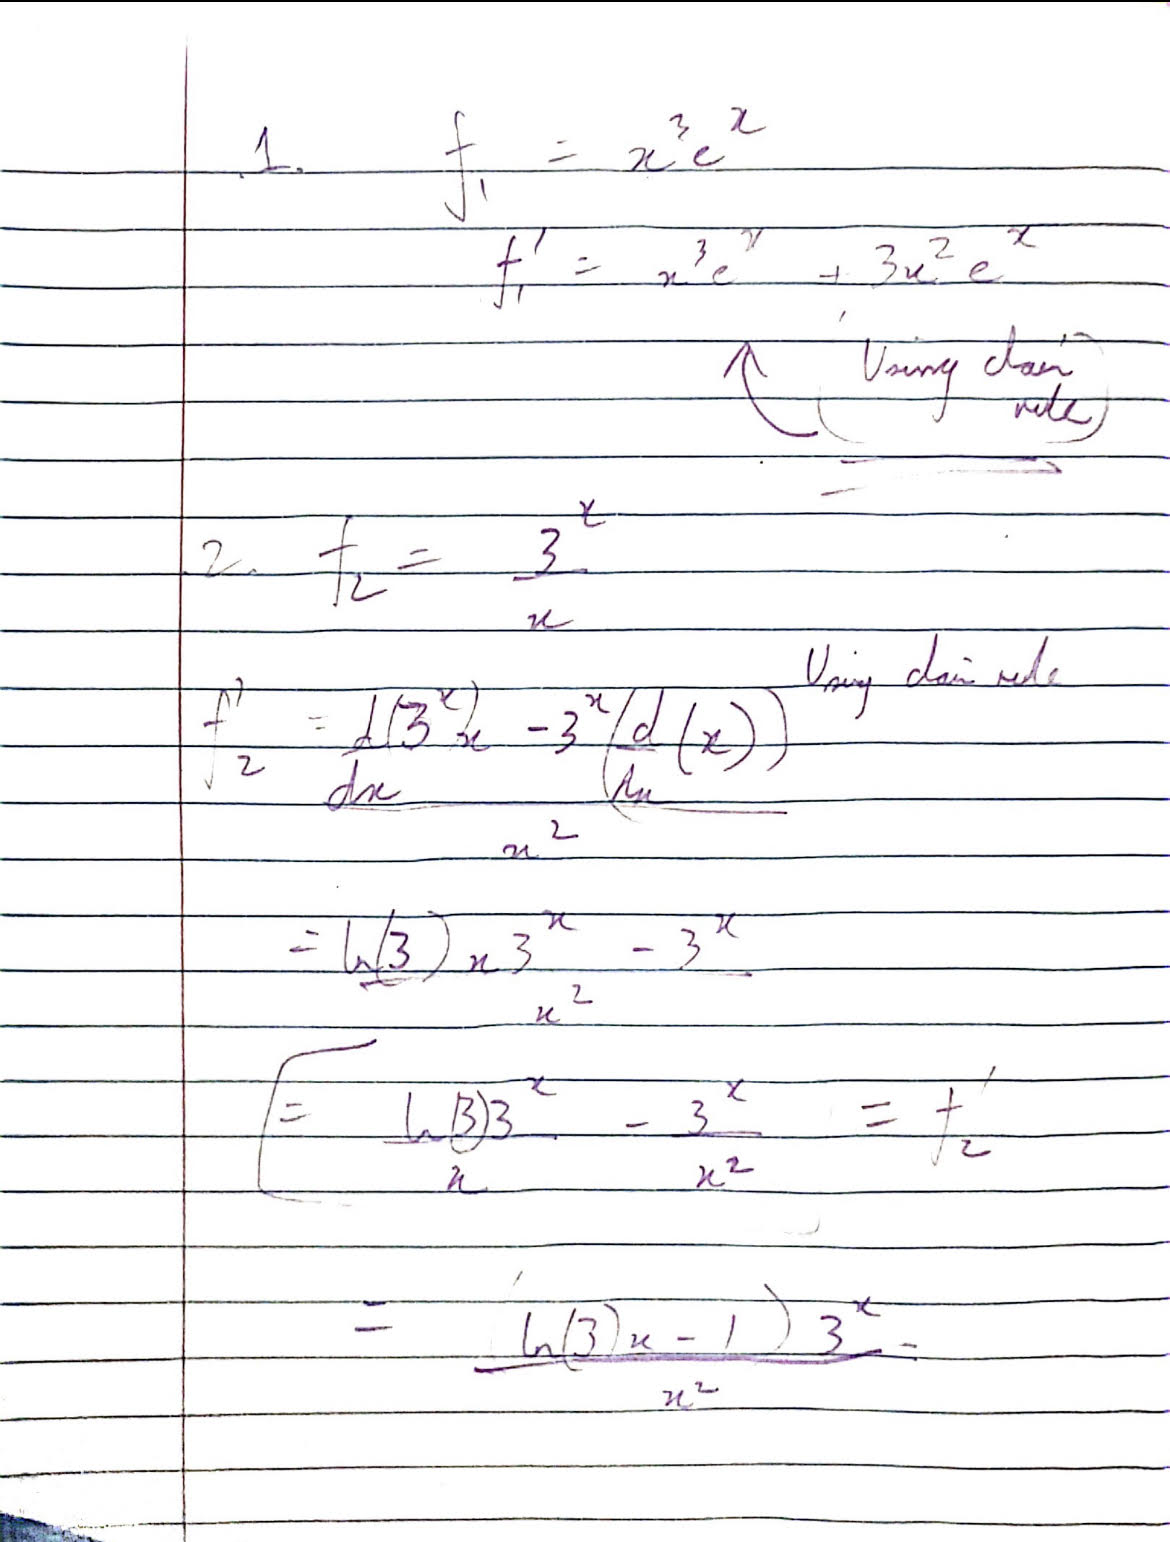 2**

In [ ]:
def deriv2pt_udf(f, x, dx):

  """
  INPUT:
  f - function to be diffrentiated
  x - array of values
  dx = delta x dx -> 0


  OUTPUT:
  dfdx: centered two point derivative function
  """

  dfdx = (f(x+dx)- f(x-dx))/(2*dx)  # two point centered formula

  return dfdx

In [ ]:

def f1(x):
    return x**3 * np.exp(x)   # function 1

def f2(x):
    return 3**x / x # function 2


def f1_derivative(x):
    return (3*x**2 * np.exp(x)) + (x**3 * np.exp(x))  # derivative of function 1

def f2_derivative(x):
    return (3**x * (np.log(3) * x - 1)) / x**2 # derivative of function 2


x1 = 0.3
x2 = 3
f1d = f1_derivative(x1)
f2d= f2_derivative(x2)

print(f1d)
print(f2d)

0.400908065850073
6.887510598012987


In [ ]:
# calculating numerical derivatives using the centered difference formula
dx_values = np.logspace(-8, -1, 10000)
f1num = deriv2pt_udf(f1, x1, dx_values)
f2num = deriv2pt_udf(f2, x2, dx_values)

misfit_f1 = np.abs((f1num - f1d) / f1d)
# calculating misfit; using absolute value to avoid negatives
misfit_f2 = np.abs((f2num - f2d) / f2d)

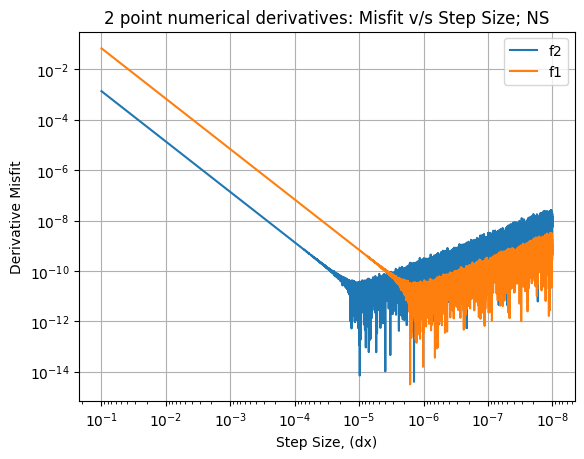

In [ ]:

plt.loglog(dx_values, misfit_f2, label='f2')
plt.loglog(dx_values, misfit_f1, label='f1')
plt.xlabel('Step Size, (dx)')
plt.ylabel('Derivative Misfit')
plt.title('2 point numerical derivatives: Misfit v/s Step Size; NS')
plt.legend()
plt.gca().invert_xaxis()
# ChatGPT syntax for reversing x axis output to match HW figure
plt.grid(True)
plt.show()

**The misfit never approaches 0 as first off our formula is just an approximation and does not really take the limit between the two points to be 0. Secondly, a computer cannot really visualize limit goes to zero and stops on the smallest number it can store. Thereafter, it breaks into a chaotic system due to this limit on its smallest number and starts increasing.**

## **QUESTION 3**

In [ ]:
import numpy as np
from scipy.io import loadmat
import scipy.optimize as opt
import matplotlib.pyplot as plt


data = loadmat('/content/drive/MyDrive/DATA_EQarrival.mat', squeeze_me=True)
#loading the file

t = data['t']
y = data['y']    #explicitly assigning t and y


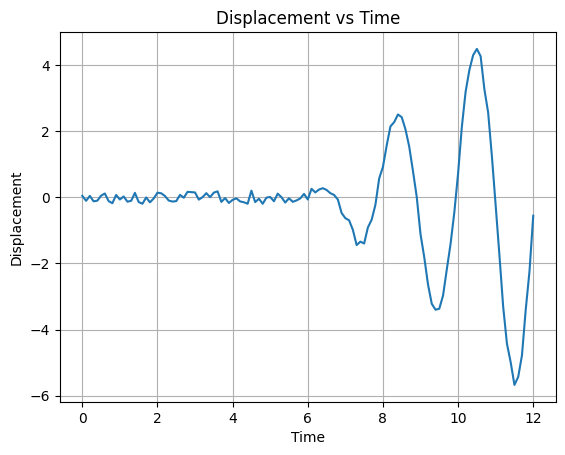

In [ ]:



# plotting just to check if dataset works
plt.plot(t, y)


plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Displacement vs Time')
plt.grid(True)
plt.show()

In [ ]:

def EQ_func(t0, period, phi, t_arr):
    """
    INPUT:
    t: Time array
    A: Amplitude of the wave
    period: period of sine wave
    phi: phase difference.
    t_arr: Arrival time of the first seismic energy.

    OUPUT:
    y: y(t) function.
    """


    y = np.where(t_arr < t0, 0,(t_arr - t0) * np.sin((2 * np.pi / period) * (t_arr - t0) + phi))
    # composite using np.where took inspiration using
    # https://numpy.org/doc/stable/reference/generated/numpy.where.html


    return y

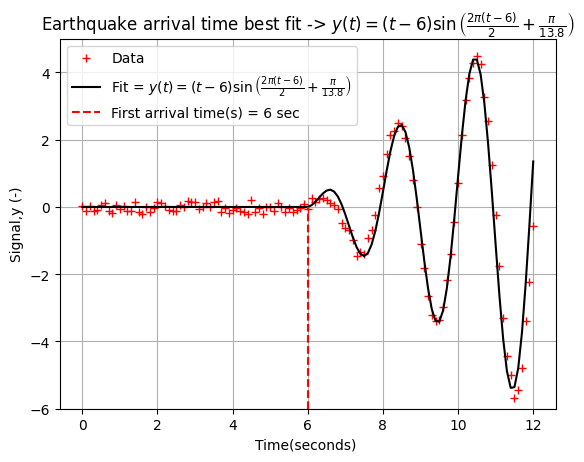

In [ ]:
yguess = EQ_func(6, 2, np.pi/13.8, t ) #guess function; played around with values here by looking at plot above



plt.plot(t, y, marker = '+', color = 'red', linestyle='None', label = 'Data')
# marker + is from
#https://stackoverflow.com/questions/57171356/how-to-change-marker-in-matplotlib-based-on-sign-of-number

plt.plot(t, yguess, color = 'black',
         label = r'Fit = $y(t) = (t-6)\sin\left(\frac{2\pi(t-6)}{2} +\frac{\pi}{13.8}\right)$') # Latex label



plt.ylim(-6, )
# setting limit to -6 in order to know the y index for the arrival time
plt.plot([6, 6], [-6, 0], color='r', linestyle='--',
         label = 'First arrival time(s) = 6 sec')
# dashed line representing arrival time

plt.legend()

plt.xlabel('Time(seconds) ')
plt.ylabel('Signal,y (-)')
plt.title(r'Earthquake arrival time best fit -> $y(t) = (t-6)\sin\left(\frac{2\pi(t-6)}{2} +\frac{\pi}{13.8}\right)$')

plt.grid(True)
plt.show()